In [1]:
# Dictionary of contractions and informal words
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "kinda": "kind of",
    "sorta": "sort of",
    "coulda": "could have",
    "woulda": "would have",
    "shoulda": "should have",
    "mighta": "might have",
    "musta": "must have",
    "oughta": "ought to",
}

# Dictionary for censored words and their uncensored counterparts
censored_words = {
    r'f\*+k|f\*+ing|f\*+': 'fuck',
    r's\*+t|s\*+': 'shit',
    r'b\*+ch|b\*+': 'bitch',
    r'd\*+n|d\*+': 'damn',
    r'a\*+hole|a\*+': 'asshole',
    r'b\*+stard|b\*+': 'bastard',
    r'c\*+t|c\*+': 'cunt',
    r'p\*+ssy|p\*+': 'pussy',
    r'd\*+ck|d\*+': 'dick',
    r'mo\*+erf\*+er|mo\*+': 'motherfucker',
}

In [2]:
import os
import json
import re
from jiwer import wer
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8-sig') as f:
        return json.load(f)

def extract_transcripts(data):
    transcripts = []
    for transcript in data.get("transcripts", []):
        transcripts.append(transcript.get("text", ""))
    return " ".join(transcripts)

# Function to preprocess text
def preprocess_text(text):
     # Normalize censored words
    for pattern, replacement in censored_words.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

     # Remove Unicode characters that are not ASCII
    text = text.encode('ascii', 'ignore').decode()
        
    # Convert text to lowercase
    text = text.lower()
    
    # Replace contractions using regular expressions
    def replace(match):
        return contractions[match.group(0)]
    
    pattern = re.compile(r'\b(' + '|'.join(contractions.keys()) + r')\b')
    text = pattern.sub(replace, text)

    # Remove info like [music]
    text = re.sub(r'\[.*?\]', '', text).strip()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def evaluate_asr(manual_transcripts, generated_transcripts):
    manual_transcripts = preprocess_text(manual_transcripts)
    generated_transcripts = preprocess_text(generated_transcripts)
  
    return wer(manual_transcripts, generated_transcripts)

def match_files_and_evaluate(manual_folder, generated_folders):
    manual_files = [f for f in os.listdir(manual_folder) if f.endswith('.json')]
    results = []

    for gen_folder in generated_folders:
        gen_files = [f for f in os.listdir(gen_folder) if f.endswith('.json')]
        model_name = os.path.basename(gen_folder)

        for gen_file in gen_files:
            yt_video_id = load_json(os.path.join(gen_folder, gen_file)).get("yt_video_id", "")
            # print(gen_file + " : " + str(yt_video_id))
            if not yt_video_id:
                continue
            manual_file = next((f for f in manual_files if yt_video_id in load_json(os.path.join(manual_folder, f)).get("yt_video_id", "")), None)
            if manual_file:
                manual_data = load_json(os.path.join(manual_folder, manual_file))
                generated_data = load_json(os.path.join(gen_folder, gen_file))

                manual_transcripts = extract_transcripts(manual_data)
                generated_transcripts = extract_transcripts(generated_data)
                
                wer_score = evaluate_asr(manual_transcripts, generated_transcripts)
                results.append({
                    "model": model_name,
                    "manual_file": manual_file,
                    "generated_file": gen_file,
                    "yt_video_id": yt_video_id,
                    "wer": wer_score
                })

    return results

In [3]:
# # The JSON data
# data = [{'text': " I've had the story for three years. I've had this interview with Virginia Roberts. We would not put it on the air. First of all, I was told, who's Jeffrey Epstein? No one knows who that is. This is a stupid story. Then the palace found out that we had her whole allegations about Prince Andrew and threatened us a million different ways. We were so afraid we wouldn't be able to interview Kate and Will that also quashed the story.", 'start': 4.275, 'end': 29.565}, {'text': ' And then Alan Dershowitz was also implicated in it because of the planes. She told me everything. She had pictures. She had everything. She was in hiding for 12 years. We convinced her to come out. We convinced her to talk to us. It was unbelievable what we had. Clinton. We had everything.', 'start': 30.077, 'end': 46.681}, {'text': " I tried for three years to get it on to no avail, and now it's all coming out, and it's like these new revelations, and I freaking had all of it. I'm so pissed right now. Every day I get more and more pissed because I'm just like, oh, my God. What we had was unreal. Other women backing it up, hey, yep.", 'start': 48.319, 'end': 69.787}, {'text': " Brad Edwards, the attorney, three years ago, saying, like, there will come a day when we will realize Jeffrey Epstein was the most prolific pedophile this country has ever known. I had it all three years ago. Yes. First of all, I was told, who's Jeffrey Epstein? No one knows who that is.", 'start': 71.169, 'end': 99.309}, {'text': " It was unbelievable what we had. Clinton, everything. Then the palace found out that we had her whole allegations about Prince Andrew and threatened us a million different ways. I've had the story for three years. I've had this interview with Virginia Roberts. We would not put it on the air. That's tape leaked to us by our latest network insider. This brave insider works at ABC News.", 'start': 102.79, 'end': 127.295}, {'text': ' ABC News anchorwoman Amy Robach is talking to her producer on a hot mic. She says she had the Jeffrey Epstein story three years ago and her bosses at ABC News spiked it. And then Alan Dershowitz was also implicated in it because of the planes. She told me everything. She had pictures. She had everything. She was in hiding for 12 years. We convinced her to come out. We convinced her to talk to us. It was unbelievable what we had. Clinton. We had everything.', 'start': 127.927, 'end': 155.316}, {'text': " I tried for three years to get it on to no avail, and now it's all coming out, and it's like these new revelations, and I freaking had all of it. I'm so pissed right now. Every day I get more and more pissed because I'm just like, oh, my God. What we had was unreal.", 'start': 156.937, 'end': 175.913}, {'text': ' Our insider told us this tape was recorded earlier this year in late August, a day or so after this NPR report came out sharply criticizing ABC News for not broadcasting the Roebuck-Giuffre interview years ago. ABC has episodically covered the scandal, yet the interview was never broadcast, and Giuffre says she was never told why. Are there women backing it up? Hey. Yep. Brad Edwards, the attorney, three years ago saying, like, aunt, like,', 'start': 175.913, 'end': 204.036}, {'text': " There will come a day when we will realize Jeffrey Epstein was the most prolific pedophile this country has ever known. I had it all three years ago. But the creepy thing is that we wouldn't make access to all of these high profile people. Well, then I got a little concerned about why I couldn't get on.", 'start': 204.462, 'end': 221.391}, {'text': ' On the leaked insider tape, Amy Robach says she had the Jeffrey Epstein story three years prior, but her exclusive interview was shelved. Robach says in the leaked tape there was a lot of pressure from Buckingham Palace. According to NPR, the famed lawyer Alan Dershowitz also pressured the network to kill the story.', 'start': 221.647, 'end': 240.469}, {'text': " Shortly before the interview was due to air, Harvard emeritus law professor Alan Dershowitz called the network. He was also one of Epstein's lead defense attorneys. We wonder if the story was killed to protect the rich and powerful. It seems few were worried about protecting the women who may have been Jeffrey Epstein's victims. Remember, Epstein was still a free man three years ago. And just to be clear, the interview has still not aired. What is ABC News waiting for, or who are they still protecting?", 'start': 240.776, 'end': 268.268}, {'text': ' She told me everything. She had pictures. She had everything. She was in hiding for 12 years. We convinced her to come out. We convinced her to talk to us. It was unbelievable what we had. Clinton. We had everything. Robach also has no doubt about what happened to Epstein when he finally was arrested and jailed. So do I think he was killed? A hundred percent. Yes, I do. Because he made his whole living blackmailing people.', 'start': 268.814, 'end': 295.538}, {'text': ' Yeah. There were a lot of men in those planes, a lot of men who visited that island, a lot of powerful men who came into that apartment. I knew immediately.', 'start': 300.503, 'end': 322.449}, {'text': " And they made it seem as though he made that suicide attempt two weeks earlier, but his lawyers claimed that he was roughed up by his cellmate around the neck. That was all, like, to plant the seed. And then... That's why I really believe it. Like, really believe it.", 'start': 325.418, 'end': 343.319}, {'text': " The last of the leaked tape has Roebuck talking about alleged Epstein conspirator Ghislaine Maxwell and how she should be very careful. He's got to have left evidence in me, you know, unexplained. Well, Ghislaine Maxwell, who I had all sorts of stuff on her, too. I love it. I'm like, it's so funny to hear everyone say her name. I'm like, oh, my God. Like, I had all that. And everyone's like, who's that? Who cares? I kept getting that. Who cares?", 'start': 347.79, 'end': 376.561}, {'text': " Um, she knows everything. She knows, she knows, she should, she should be careful. Well, she was his, like, she went out and recruited all of these girls. She should watch her back. Because if she goes, I mean, I'd have like security guards all around me.", 'start': 378.217, 'end': 405.06}, {'text': ' The brave insider who leaked this tape to us does not know who at ABC News spiked the story. But someone at ABC does. Our question.', 'start': 406.271, 'end': 416.203}, {'text': " Who killed the Epstein story at ABC News and why? Help us find out. James Goldston is the president of ABC News. What did he know and when did he know it? Here's the landline number for ABC News president Goldston and his Twitter account. If you're an insider at ABC News or any other major media outlet or big tech company and you have seen corruption or bias, contact us at projectveritas.com.", 'start': 416.544, 'end': 445.503}, {'text': ' Be a catalyst for change. Be brave. Do something.', 'start': 445.503, 'end': 452.688}]

# # Concatenating all the text into one paragraph
# paragraph = " ".join(item['text'] for item in data)

# # Printing the concatenated paragraph
# print(paragraph)

In [4]:
# text1 = "I've had the story for three years. I've had this interview with Virginia Roberts. We would not put it on the air. First of all, I was told, who's Jeffrey Epstein? No one knows who that is. This is a stupid story. Then the palace found out that we had her whole allegations about Prince Andrew and threatened us a million different ways. We were so afraid we wouldn't be able to interview Kate and Will that also quashed the story.  And then Alan Dershowitz was also implicated in it because of the planes. She told me everything. She had pictures. She had everything. She was in hiding for 12 years. We convinced her to come out. We convinced her to talk to us. It was unbelievable what we had. Clinton. We had everything.  I tried for three years to get it on to no avail, and now it's all coming out, and it's like these new revelations, and I freaking had all of it. I'm so pissed right now. Every day I get more and more pissed because I'm just like, oh, my God. What we had was unreal. Other women backing it up, hey, yep.  Brad Edwards, the attorney, three years ago, saying, like, there will come a day when we will realize Jeffrey Epstein was the most prolific pedophile this country has ever known. I had it all three years ago. Yes. First of all, I was told, who's Jeffrey Epstein? No one knows who that is.  It was unbelievable what we had. Clinton, everything. Then the palace found out that we had her whole allegations about Prince Andrew and threatened us a million different ways. I've had the story for three years. I've had this interview with Virginia Roberts. We would not put it on the air. That's tape leaked to us by our latest network insider. This brave insider works at ABC News.  ABC News anchorwoman Amy Robach is talking to her producer on a hot mic. She says she had the Jeffrey Epstein story three years ago and her bosses at ABC News spiked it. And then Alan Dershowitz was also implicated in it because of the planes. She told me everything. She had pictures. She had everything. She was in hiding for 12 years. We convinced her to come out. We convinced her to talk to us. It was unbelievable what we had. Clinton. We had everything.  I tried for three years to get it on to no avail, and now it's all coming out, and it's like these new revelations, and I freaking had all of it. I'm so pissed right now. Every day I get more and more pissed because I'm just like, oh, my God. What we had was unreal.  Our insider told us this tape was recorded earlier this year in late August, a day or so after this NPR report came out sharply criticizing ABC News for not broadcasting the Roebuck-Giuffre interview years ago. ABC has episodically covered the scandal, yet the interview was never broadcast, and Giuffre says she was never told why. Are there women backing it up? Hey. Yep. Brad Edwards, the attorney, three years ago saying, like, aunt, like,  There will come a day when we will realize Jeffrey Epstein was the most prolific pedophile this country has ever known. I had it all three years ago. But the creepy thing is that we wouldn't make access to all of these high profile people. Well, then I got a little concerned about why I couldn't get on.  On the leaked insider tape, Amy Robach says she had the Jeffrey Epstein story three years prior, but her exclusive interview was shelved. Robach says in the leaked tape there was a lot of pressure from Buckingham Palace. According to NPR, the famed lawyer Alan Dershowitz also pressured the network to kill the story.  Shortly before the interview was due to air, Harvard emeritus law professor Alan Dershowitz called the network. He was also one of Epstein's lead defense attorneys. We wonder if the story was killed to protect the rich and powerful. It seems few were worried about protecting the women who may have been Jeffrey Epstein's victims. Remember, Epstein was still a free man three years ago. And just to be clear, the interview has still not aired. What is ABC News waiting for, or who are they still protecting?  She told me everything. She had pictures. She had everything. She was in hiding for 12 years. We convinced her to come out. We convinced her to talk to us. It was unbelievable what we had. Clinton. We had everything. Robach also has no doubt about what happened to Epstein when he finally was arrested and jailed. So do I think he was killed? A hundred percent. Yes, I do. Because he made his whole living blackmailing people.  Yeah. There were a lot of men in those planes, a lot of men who visited that island, a lot of powerful men who came into that apartment. I knew immediately.  And they made it seem as though he made that suicide attempt two weeks earlier, but his lawyers claimed that he was roughed up by his cellmate around the neck. That was all, like, to plant the seed. And then... That's why I really believe it. Like, really believe it.  The last of the leaked tape has Roebuck talking about alleged Epstein conspirator Ghislaine Maxwell and how she should be very careful. He's got to have left evidence in me, you know, unexplained. Well, Ghislaine Maxwell, who I had all sorts of stuff on her, too. I love it. I'm like, it's so funny to hear everyone say her name. I'm like, oh, my God. Like, I had all that. And everyone's like, who's that? Who cares? I kept getting that. Who cares?  Um, she knows everything. She knows, she knows, she should, she should be careful. Well, she was his, like, she went out and recruited all of these girls. She should watch her back. Because if she goes, I mean, I'd have like security guards all around me.  The brave insider who leaked this tape to us does not know who at ABC News spiked the story. But someone at ABC does. Our question.  Who killed the Epstein story at ABC News and why? Help us find out. James Goldston is the president of ABC News. What did he know and when did he know it? Here's the landline number for ABC News president Goldston and his Twitter account. If you're an insider at ABC News or any other major media outlet or big tech company and you have seen corruption or bias, contact us at projectveritas.com.  Be a catalyst for change. Be brave. Do something."
# text2 = "I've had the story for three years. I've had this interview with Virginia Roberts. We would not put it on the air. First of all, I was told, who's Jeffrey Epstein? No one knows who that is. This is a stupid story. Then the palace found out that we had her whole allegations about Prince Andrew and threatened us a million different ways. We were so afraid we wouldn't be able to interview Kate and Will that also quashed the story. And then Alan Dershowitz was also implicated in it because of the planes. She told me everything. She had pictures. She had everything. She was in hiding for 12 years. We convinced her to come out. We convinced her to talk to us. It was unbelievable what we had. Clinton. We had everything. I tried for three years to get it on to no avail, and now it's all coming out, and it's like these new revelations, and I freaking had all of it. I'm so pissed right now. Every day I get more and more pissed because I'm just like, oh, my God. What we had was unreal. Other women backing it up, hey, yep. Brad Edwards, the attorney, three years ago, saying, like, there will come a day when we will realize Jeffrey Epstein was the most prolific pedophile this country has ever known. I had it all three years ago. Yes. First of all, I was told, who's Jeffrey Epstein? No one knows who that is. It was unbelievable what we had. Clinton, everything. Then the palace found out that we had her whole allegations about Prince Andrew and threatened us a million different ways. I've had the story for three years. I've had this interview with Virginia Roberts. We would not put it on the air. That's tape leaked to us by our latest network insider. This brave insider works at ABC News. ABC News anchorwoman Amy Robach is talking to her producer on a hot mic. She says she had the Jeffrey Epstein story three years ago and her bosses at ABC News spiked it. And then Alan Dershowitz was also implicated in it because of the planes. She told me everything. She had pictures. She had everything. She was in hiding for 12 years. We convinced her to come out. We convinced her to talk to us. It was unbelievable what we had. Clinton. We had everything. I tried for three years to get it on to no avail, and now it's all coming out, and it's like these new revelations, and I freaking had all of it. I'm so pissed right now. Every day I get more and more pissed because I'm just like, oh, my God. What we had was unreal. Our insider told us this tape was recorded earlier this year in late August, a day or so after this NPR report came out sharply criticizing ABC News for not broadcasting the Roebuck-Giuffre interview years ago. ABC has episodically covered the scandal, yet the interview was never broadcast, and Giuffre says she was never told why. Are there women backing it up? Hey. Yep. Brad Edwards, the attorney, three years ago saying, like, aunt, like, There will come a day when we will realize Jeffrey Epstein was the most prolific pedophile this country has ever known. I had it all three years ago. But the creepy thing is that we wouldn't make access to all of these high profile people. Well, then I got a little concerned about why I couldn't get on. On the leaked insider tape, Amy Robach says she had the Jeffrey Epstein story three years prior, but her exclusive interview was shelved. Robach says in the leaked tape there was a lot of pressure from Buckingham Palace. According to NPR, the famed lawyer Alan Dershowitz also pressured the network to kill the story. Shortly before the interview was due to air, Harvard emeritus law professor Alan Dershowitz called the network. He was also one of Epstein's lead defense attorneys. We wonder if the story was killed to protect the rich and powerful. It seems few were worried about protecting the women who may have been Jeffrey Epstein's victims. Remember, Epstein was still a free man three years ago. And just to be clear, the interview has still not aired. What is ABC News waiting for, or who are they still protecting? She told me everything. She had pictures. She had everything. She was in hiding for 12 years. We convinced her to come out. We convinced her to talk to us. It was unbelievable what we had. Clinton. We had everything. Robach also has no doubt about what happened to Epstein when he finally was arrested and jailed. So do I think he was killed? A hundred percent. Yes, I do. Because he made his whole living blackmailing people. Yeah. There were a lot of men in those planes, a lot of men who visited that island, a lot of powerful men who came into that apartment. I knew immediately. And they made it seem as though he made that suicide attempt two weeks earlier, but his lawyers claimed that he was roughed up by his cellmate around the neck. That was all, like, to plant the seed. And then... That's why I really believe it. Like, really believe it. The last of the leaked tape has Roebuck talking about alleged Epstein conspirator Ghislaine Maxwell and how she should be very careful. He's got to have left evidence in me, you know, unexplained. Well, Ghislaine Maxwell, who I had all sorts of stuff on her, too. I love it. I'm like, it's so funny to hear everyone say her name. I'm like, oh, my God. Like, I had all that. And everyone's like, who's that? Who cares? I kept getting that. Who cares? Um, she knows everything. She knows, she knows, she should, she should be careful. Well, she was his, like, she went out and recruited all of these girls. She should watch her back. Because if she goes, I mean, I'd have like security guards all around me. The brave insider who leaked this tape to us does not know who at ABC News spiked the story. But someone at ABC does. Our question. Who killed the Epstein story at ABC News and why? Help us find out. James Goldston is the president of ABC News. What did he know and when did he know it? Here's the landline number for ABC News president Goldston and his Twitter account. If you're an insider at ABC News or any other major media outlet or big tech company and you have seen corruption or bias, contact us at projectveritas.com. Be a catalyst for change. Be brave. Do something."

# evaluate_asr(text1, text2)

In [5]:
manual_folder = 'test_data'
generated_folders = [
    # 'Whisper-Pyannote_large-v3',
    'Whisper-Nemo_base.en',
    'Whisper-Nemo_base',
    'Whisper-Nemo_tiny.en',
    'Whisper-Nemo_tiny',
    'Whisper-Nemo_small.en',
    'Whisper-Nemo_small',
    'Whisper-Nemo_medium.en',
    'Whisper-Nemo_medium',
    'Whisper-Nemo_large',
    # 'Whisper-Nemo_large--no-stem',
    'Whisper-Nemo_large-v1',
    'Whisper-Nemo_large-v2',
    'Whisper-Nemo_large-v3',
    # 'Whisper-Nemo_large-v3--no-stem',
    # 'result_audio_files_OLD_large-v3',
    # 'result_audio_files_WONLY'
    # Add more generated folders as needed
]

results = match_files_and_evaluate(manual_folder, generated_folders)

In [6]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='manual_file')

,model,manual_file,generated_file,yt_video_id,wer
188,Whisper-Nemo_medium.en,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.250208
328,Whisper-Nemo_large-v3,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.128013
20,Whisper-Nemo_base.en,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.177889
300,Whisper-Nemo_large-v2,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.194514
272,Whisper-Nemo_large-v1,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.164589
76,Whisper-Nemo_tiny.en,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.254364
244,Whisper-Nemo_large,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.137988
216,Whisper-Nemo_medium,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.194514
104,Whisper-Nemo_tiny,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.217789
48,Whisper-Nemo_base,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.295096


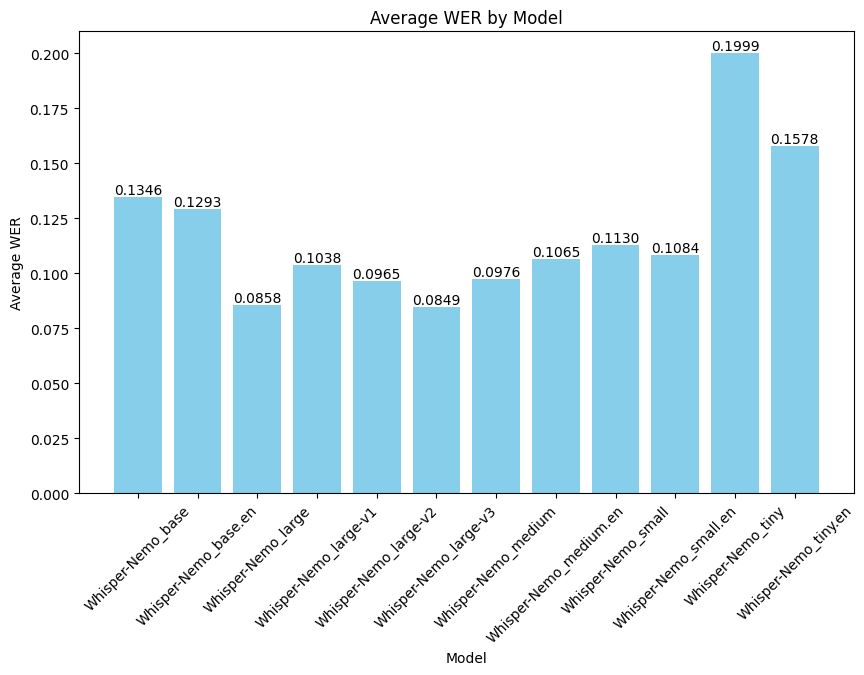

In [7]:
# Group by model and calculate average WER
average_wer = results_df.groupby('model')['wer'].mean().reset_index()
average_wer

# Plotting the results with detailed values on top of bars
plt.figure(figsize=(10, 6))
bars = plt.bar(average_wer['model'], average_wer['wer'], color='skyblue')

# Add detailed values on top of bars
for bar, value in zip(bars, average_wer['wer']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{value:.4f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Average WER')
plt.title('Average WER by Model')
plt.xticks(rotation=45)
plt.show()